# XEFI Literature Reproduction
### Reproducing the Dev example from literature.

Dev, B. N., Amal K. Das, S. Dev, D. W. Schubert, M. Stamm, and G. Materlik.

“Resonance Enhancement of x Rays in Layered Materials: Application to Surface Enrichment in Polymer Blends.” 

Physical Review B 61, no. 12 (2000): 8462–68. https://doi.org/10.1103/PhysRevB.61.8462.

In [1]:
import XEFI
import numpy as np
import matplotlib.pyplot as plt

# import kkcalc.models as kkmodels
# refractive_db = kkmodels.asp_db_complex

In [2]:
# Define some system parameters
beam_energy = 16.9e3  # in eV
wav = (XEFI.models.basic.en2wav) / beam_energy  # to Angstroms
print(rf"$\lambda$ = {wav:0.2f} Å")

angles_rad = np.linspace(0.5e-3, 3.0e-3, 3000)  # in radians

z = [
    0,
    -1000,
    -1500,
]  # Define the z-coordinates for the multilayer interface

labels = ["Air", "Poly", "Au", "Si"]

$\lambda$ = 0.73 Å


Collect the refractive indexes using kkcalc

In [3]:
# PS = kk.stoichiometry("C8H8") # Polystyrene
# PS_density = 1.048
# refractive_PS = refractive_db(PS, density = PS_density, name="PS")
# x = 0.06
# PBrxS = kk.stoichiometry(f"C8H{8-x}Br{x}") # polybromostyrene [CH2CH(C6H4Br)]n - brominated polystyrene
# PBrxS_density = PS_density + 0.655 * x
# refractive_PBrxS = refractive_db(PBrxS, density = PBrxS_density, name="PBrxS")

# # No way to add `refractive_PS` and `refractive_PBrxS` at the moment...

# refractive_air = 1.0 + 0j
# refractive_Au = refractive_db("Au", density = 19.32, name="Au")
# refractive_Si = refractive_db("Si", density = 2.329, name="Si")


In [4]:
refractive_air = 1 - (0.0) + 1j * (0.0)
refractive_poly = 1 - (1.87e-6) + 1j * (1.18e-8)
refractive_au = 1 - (2.18e-5) + 1j * (2.63e-6)
refractive_si = 1 - (3.38e-6) + 1j * (1.093e-8)

In [ ]:
refractive_indicies: list[complex] = [  # | list["kkmodels.asp_complex"]
    refractive_air,
    refractive_poly,
    refractive_au,
    refractive_si,
]  #

# labels = ["Air"] + [
#     ref.name
#     for ref in refractive_indicies[1:]
# ]

NameError: name 'kkmodels' is not defined

In [ ]:
# Checking the assertion that Dev's critical angle of the polymer is 1.37 mrad.
poly_crit = np.sqrt(2 * 1.87e-6)
display(f"{poly_crit * 1000:0.5f} mrad")

'1.93391 mrad'

In [ ]:
result = XEFI.XEF_Basic(
    energies=beam_energy,
    angles=angles_rad,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
    method=XEFI.XEF_method.DEV,
    angles_in_deg=False,
)

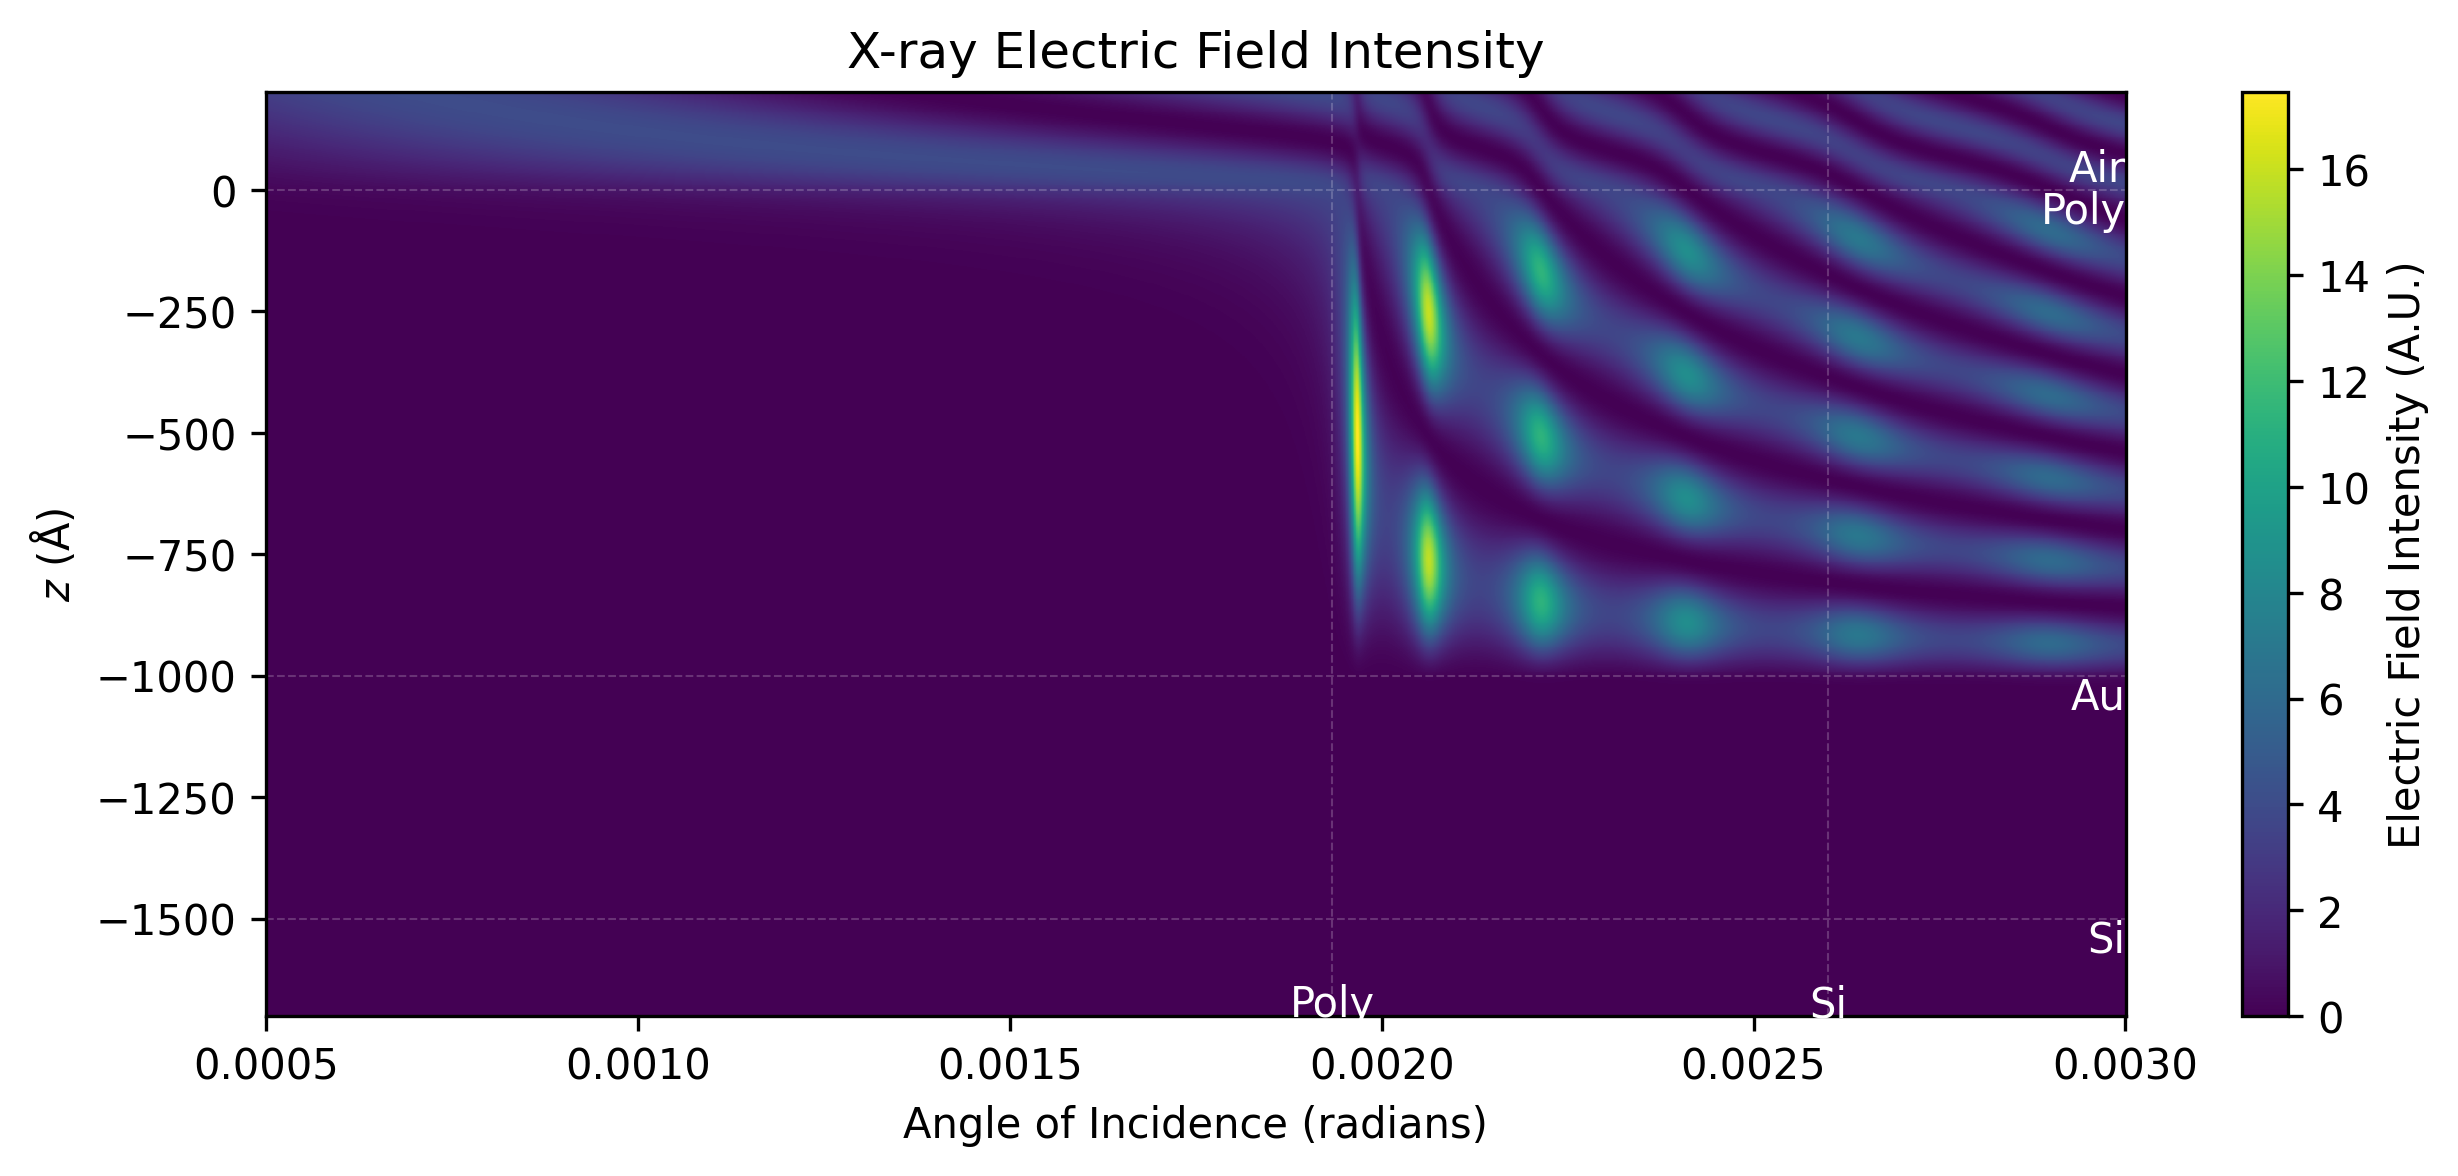

In [ ]:
z_vals = np.linspace(200, -1700, 1000)
# norm = mc.LogNorm(vmin=1e-6, vmax=10)
# norm = mc.Normalize(vmin=0, vmax=10)
fig, ax = result.generate_pretty_figure_XEFI(
    z_vals,
    # norm=norm,
    angles_in_deg=False,
)

The expected result of reflectivity and transmitted field intensity (E1/E0)

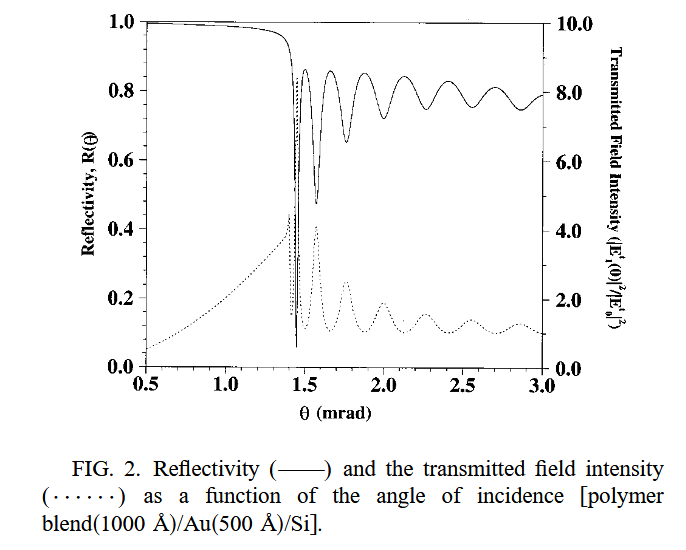

(0.0, 10.0)

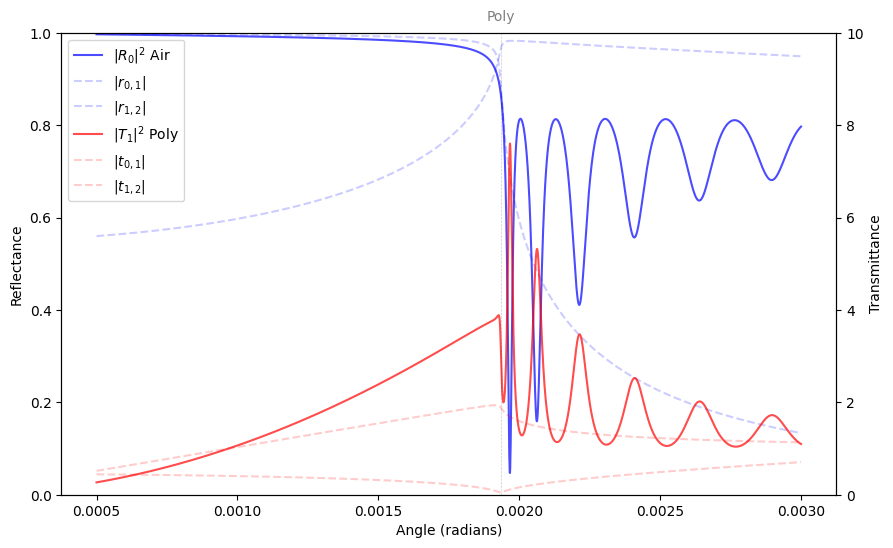

In [ ]:
# Plotting the Reflectivity and the Transmission into the first layer
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
twin = ax.twinx()

result.graph_field_coefficients(
    layers=0,
    ax_R=ax,
    angles_in_deg=False,
    c="blue",
    inset=False,
    inset_loc="lower left",
    scale="linear",
)
result.graph_field_coefficients(
    layers=1,
    ax_T=twin,
    angles_in_deg=False,
    c="red",
    inset=False,
    inset_loc="lower left",
    scale="linear",
)

result.graph_fresnel_magnitude(
    ax, angles_in_deg=False, alpha=0.2, linestyle="--", transmission=False, c="blue"
)
result.graph_fresnel_magnitude(
    twin, angles_in_deg=False, alpha=0.2, linestyle="--", reflection=False, c="red"
)

lines = ax.get_lines() + twin.get_lines()
lines = [line for line in lines if not line.get_label().startswith("_")]
ax.legend(loc="upper left", handles=lines)

ax.set_ylim(0, 1)
twin.set_ylim(0, 10)